In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime
from scipy.stats import pearsonr
from sklearn.kernel_ridge import KernelRidge
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
df = pd.read_csv('ttl_daily.csv', names=['date', 'cnt']).ix[1:,:]
print(df.head())

df['date'] = pd.to_datetime(df['date'])
# df = df.sort_values(by='date')

df['month'] = df.date.apply(lambda x: x.strftime('%Y-%m')) 
print(df.head())

df = df.groupby(by='month').sum()
df.head()

         date   cnt
1  01/01/2006  1485
2  01/01/2007  1636
3  01/01/2008  1631
4  01/01/2009  1547
5  01/01/2010  1757
        date   cnt    month
1 2006-01-01  1485  2006-01
2 2007-01-01  1636  2007-01
3 2008-01-01  1631  2008-01
4 2009-01-01  1547  2009-01
5 2010-01-01  1757  2010-01


,cnt
month,
2006-01,28335
2006-02,24071
2006-03,28543
2006-04,27803
2006-05,30058


In [3]:
m_vals = df['cnt'].values
months = df.index.values

In [4]:
ue = pd.read_excel('unemployment_rate.xlsx', sheetname='unemploy')
ue_vals = ue.ix[:, 1:].values.flatten()
ue_vals

array([ 4.8,  4.7,  4.7,  4.7,  4.7,  4.6,  4.6,  4.5,  4.4,  4.3,  4.3,
        4.3,  4.3,  4.3,  4.4,  4.4,  4.5,  4.6,  4.7,  4.7,  4.8,  4.8,
        4.8,  4.9,  4.9,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.6,  5.8,
        6.1,  6.4,  6.8,  7.2,  7.6,  8. ,  8.2,  8.4,  8.6,  8.7,  8.8,
        8.8,  8.9,  8.9,  8.9,  8.8,  8.8,  8.7,  8.7,  8.6,  8.5,  8.5,
        8.5,  8.5,  8.5,  8.4,  8.4,  8.3,  8.2,  8.1,  8.1,  8.1,  8.2,
        8.2,  8.3,  8.4,  8.4,  8.5,  8.5,  8.6,  8.6,  8.7,  8.7,  8.7,
        8.7,  8.6,  8.4,  8.3,  8.2,  8.2,  8.1,  8. ,  7.9,  7.8,  7.7,
        7.7,  7.6,  7.6,  7.6,  7.5,  7.3,  7.2,  7. ,  6.9,  6.8,  6.7,
        6.6,  6.5,  6.3,  6.2,  6.1,  6. ,  5.9,  5.9,  5.8,  5.7,  5.7,
        5.6,  5.5,  5.4,  5.3,  5.2,  5.1,  5. ,  5. ,  4.9,  4.9])

In [5]:
def normalize(vals):
    return (vals - np.mean(vals)) / np.std(vals)

In [6]:
m_vals = normalize(m_vals)
ue_vals = normalize(ue_vals)

In [7]:
len(m_vals), len(ue_vals)

(120, 120)

In [8]:
x = np.arange(len(m_vals))
X = np.arange(len(m_vals)).reshape([-1,1])

def smooth(x, y, nb):
    y_smooth = np.zeros(x.shape[0])
    for i in range(len(x)):
        if i-nb < 0:
            y_smooth[i] = np.mean(y[:i+11])
        elif i+nb+1 > len(y):
            y_smooth[i] = np.mean(y[i-nb:])
        else:
            y_smooth[i] = np.mean(y[i-nb:i+nb+1])
    return y_smooth
            
            
m_smooth_avg = smooth(x, m_vals, 2)
smooth_unemploy = smooth(x, ue_vals, 1)

In [9]:
m_vals.min()

-2.7405656413578292

In [10]:
# str(np.array([p_value]))[3:-1]

---

## Unemployment and Highly Correlated Crime Types

In [11]:
df_kycdMonth = pd.read_csv('kycd_monthly.csv')
df_kycdMonth.columns = ['Month', 'KYCD', 'Count']

In [12]:
df_of = pd.read_csv('kycd_OfnsDesc.csv')
criminal_kycds = [236, 232, 358]  # Best
labels = {236: 'DANGEROUS WEAPONS', 232: 'POSSESSION OF STOLEN PROPERTY', 358: 'OFFENSES INVOLVING FRAUD'}
# criminal_kycds = [361, 118, 359]  # Second Best
# df_of.sort_values(by='Counts', ascending=False).head(30)

In [19]:
df_of.sort_values(by='Counts', ascending=False).head(9).KY_CD.values

array([341, 578, 344, 351, 109, 235, 361, 105, 107])

In [20]:
df_of[df_of.KY_CD.isin([341, 578, 344, 351, 109, 235, 361, 105, 107])]


,KY_CD,OFNS_DESC,Counts
4,105,NaN,2
5,105,ROBBERY,198772
8,107,NaN,1
9,107,BURGLARY,191406
10,109,NaN,9
11,109,GRAND LARCENY,429196
49,235,NaN,11
50,235,DANGEROUS DRUGS,285790
58,341,NaN,10
59,341,PETIT LARCENY,822498


In [13]:
DF = df_of[df_of.KY_CD.isin(criminal_kycds)]
DF

,KY_CD,OFNS_DESC,Counts
44,232,NaN,1
45,232,POSSESSION OF STOLEN PROPERTY,20376
51,236,NaN,8
52,236,DANGEROUS WEAPONS,73672
87,358,NaN,2
88,358,OFFENSES INVOLVING FRAUD,17737


In [14]:
dic = {}
for code in criminal_kycds:
    dic[code] = smooth(x, normalize(df_kycdMonth[df_kycdMonth.KYCD==code].Count.values), 1)

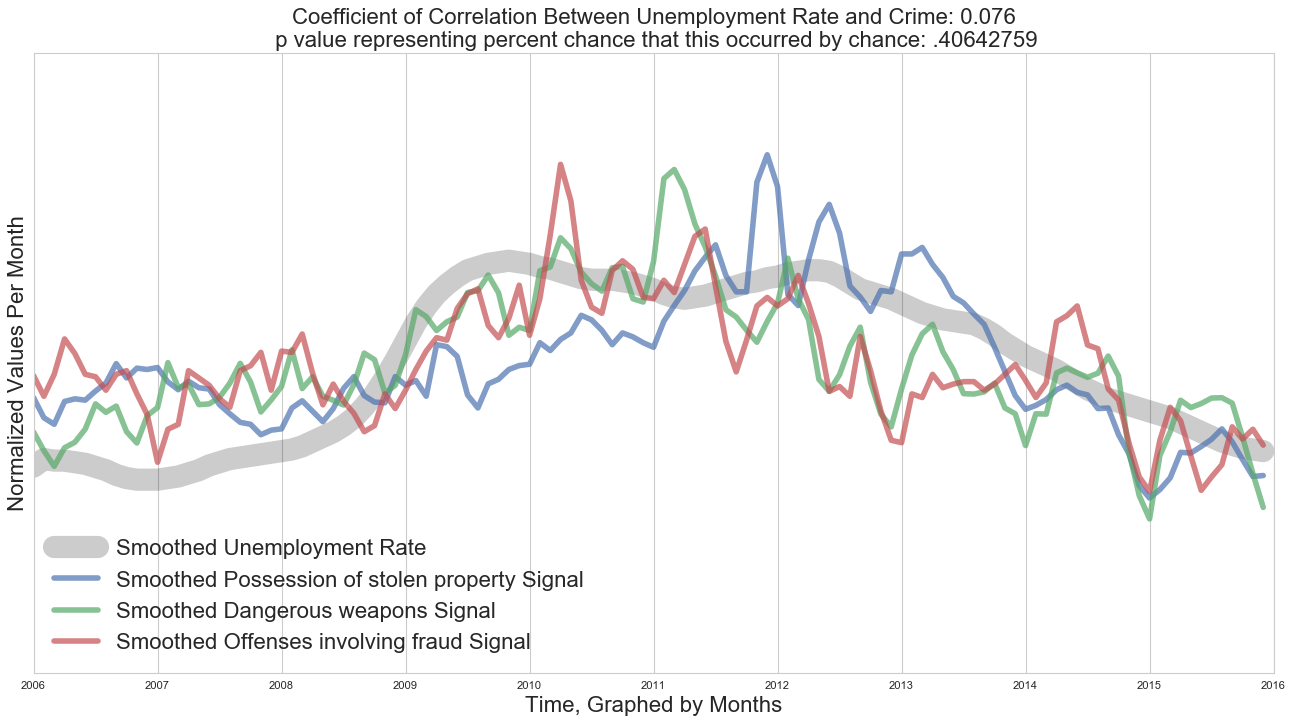

In [23]:
plt.figure(figsize=(20, 10))
plt.plot(X, smooth_unemploy, c='black', linewidth=20, alpha=.2, label = 'Smoothed Unemployment Rate')

# plt.scatter(X, m_vals, s=100, alpha=.5, c='steelblue', label = 'Monthly Crime Incidents')
# plt.plot(X, m_smooth_avg, c='skyblue', alpha=.7, linewidth=4, label = 'Smoothed Crime Signal')

for k, v in dic.items():
    plt.plot(X, v, alpha=.7, linewidth=5, label = 'Smoothed ' + labels[k].capitalize() + ' Signal')


plt.xlim(xmin=0, xmax=len(m_vals))
plt.ylim(ymin=-4, ymax=4)
plt.xticks(np.arange(0, 121, 12).tolist(), np.arange(2006, 2017).tolist())
plt.yticks([])

coef, p_value = pearsonr(ue_vals, m_vals)

plt.ylabel('Normalized Values Per Month', fontsize = 20)
plt.xlabel('Time, Graphed by Months', fontsize = 20)
# plt.title('NYC Crime Over Time', fontsize = 30)
plt.title('Coefficient of Correlation Between Unemployment Rate and Crime: ' + str(np.round(coef, 3)) + 
         '\n p value representing percent chance that this occurred by chance: ' + str(np.array([p_value]))[3:-1],
          fontsize=20)
plt.legend(fontsize = 20, loc=0)

plt.show()

### About Statistical correlations of criminal behaviour

https://en.wikipedia.org/wiki/Statistical_correlations_of_criminal_behaviour